In [1]:
import pandas as pd
from sklearn import datasets
import openensembles as oe

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


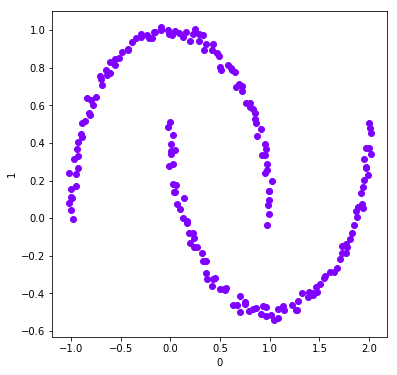

In [17]:
#Set up a dataset and put in pandas DataFrame.
x, y = datasets.make_moons(n_samples=200, shuffle=True, noise=0.02, random_state=None)
df = pd.DataFrame(x)
#instantiate the oe data object
dataObj = oe.data(df, df.columns)
dataObj.transform('parent', 'zscore', 'zscore')
dataObj.plot_data('parent')
#instantiate an oe clustering object
c = oe.cluster(dataObj)
c_MV_arr = []
val_arr = []

In [3]:
for i in range(0,39):
    # add a new clustering solution, with a unique name
    name = 'kmeans_' + str(i)
    c.cluster('parent', 'kmeans', name, K=16, init = 'random', n_init = 1)
    # calculate a new majority vote solution, where c has one more solution on each iteration
    c_MV_arr.append(c.finish_majority_vote(threshold=0.5))
    #calculate the determinant ratio metric for each majority vote solution
    v = oe.validation(dataObj, c_MV_arr[i])
    val_name = v.calculate('det_ratio', 'majority_vote', 'parent')
    val_arr.append(v.validation[val_name])

/home/sette/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.co_matrix.as_matrix()
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sette/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.co_matrix.as_matrix()
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scala

/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sette/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.co_matrix.as_matrix()
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sette/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values in

/home/sette/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.co_matrix.as_matrix()
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sette/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.co_matrix.as_matrix()
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sette/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scala

In [20]:
#calculate the co-occurrence matrix
coMat = c.co_occurrence_matrix()

fig = dataObj.plot_data('parent', class_labels=c_MV_arr[30].labels['majority_vote'])
plt.title('Majority vote across %d solutions'%(30+1))
plt.show()

ValueError: Distance matrix 'X' must be symmetric.